In [56]:
#因期交所的資料  並不像是證交所 直接顯示在網站 responds 的html內 (可用相對簡單的 request 套件) 而是另外透過資料庫拿取
#期交所網站限制 一次只能下載30天
import urllib3 #使用urllib3下載資料套件 可支援更多進階用法 
from bs4 import BeautifulSoup #解析下載的html內容

#資料處理套件
import pandas as pd #儲存成datafram的形式
from datetime import datetime,date #把下載到的資料日期 從字串轉為日期型態

#畫圖套件
import matplotlib.pyplot as plt
# %matplotlib inline

In [60]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/pcRatio"
res = http.request(
    'POST',
    url,
    fields ={
        'queryStartDate':'2024/08/01',
        'queryEndDate': '2024/08/16'    
   }
    
)

html_doc = res.data
html_doc

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\r\n\r\n\r\n<head><meta http-equiv="X-UA-Compatible" content="IE=edge"></head>\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="zh-Hant-TW" >\r\n\t\t<head>\r\n<!-- <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"> -->\r\n<!-- <link rel="shortcut icon" type="image/x-icon" -->\r\n<!-- <meta property="og:image" -->\r\n<!-- \tcontent="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" /> -->\r\n<!-- <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> -->\r\n<!-- <meta http-equiv="X-UA-Compatible" content="IE=edge"> -->\r\n<title>\xe8\x87\xba\xe7\x81\xa3\xe6\x9c\x9f\xe8\xb2\xa8\xe4\xba\xa4\xe6\x98\x93\xe6\x89\x80-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe9\x81\xb8\xe6\x93\x87\xe6\xac\x8a-\xe8\x87\xba\xe6\x8c\x87\xe9\x81\xb8\xe6\x93\x87\xe6\xac\x8aPut/Call\xe6\xaf\x94</title>\r\n<!-- favicon -->\r\n<li

In [62]:
# soup = BeautifulSoup(html_doc,'html5lib')
# soup
soup = BeautifulSoup(html_doc,'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">

<head><meta content="IE=edge" http-equiv="X-UA-Compatible"/></head>
<html lang="zh-Hant-TW" xmlns="http://www.w3.org/1999/xhtml">
<head>
<!-- <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"> -->
<!-- <link rel="shortcut icon" type="image/x-icon" -->
<!-- <meta property="og:image" -->
<!-- 	content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" /> -->
<!-- <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> -->
<!-- <meta http-equiv="X-UA-Compatible" content="IE=edge"> -->
<title>臺灣期貨交易所-交易資訊-交易資訊-選擇權-臺指選擇權Put/Call比</title>
<!-- favicon -->
<link href="/cht/resources/front/cht/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="website" property="og:type">
<meta content="臺灣期貨交易所" property="og:title"/>
<meta content="臺灣期貨交易所網站摘要" name="description"/>
<meta content="http://www.taifex.com.tw/cht/images/fb_logo.jpg" property="og:im

In [66]:
table = soup.table
table
# type(table)

<table border="0" cellpadding="0" cellspacing="0" class="table_f table-sticky table-fixed w-730" width="100%">
<thead>
<tr>
<th>日期</th>
<th>賣權成交量</th>
<th>買權成交量</th>
<th>買賣權成交量比率%</th>
<th>賣權未平倉量</th>
<th>買權未平倉量</th>
<th>買賣權未平倉量比率%</th>
</tr>
</thead>
<tr>
<td align="center">2024/8/16</td>
<td align="center">295,609</td>
<td align="center">266,796</td>
<td align="center">110.80</td>
<td align="center">
									216,666</td>
<td align="center">
									183,981</td>
<td align="center">117.77</td>
</tr>
<tr>
<td align="center">2024/8/15</td>
<td align="center">228,817</td>
<td align="center">225,274</td>
<td align="center">101.57</td>
<td align="center">
									187,064</td>
<td align="center">
									179,028</td>
<td align="center">104.49</td>
</tr>
<tr>
<td align="center">2024/8/14</td>
<td align="center">523,008</td>
<td align="center">479,709</td>
<td align="center">109.03</td>
<td align="center">
									148,584</td>
<td align="center">
									150,337</td>
<td align="center">9

In [68]:
df = pd.read_html(str(table))
df
# type(df)


[           日期   賣權成交量   買權成交量  買賣權成交量比率%  賣權未平倉量  買權未平倉量  買賣權未平倉量比率%
 0   2024/8/16  295609  266796     110.80  216666  183981      117.77
 1   2024/8/15  228817  225274     101.57  187064  179028      104.49
 2   2024/8/14  523008  479709     109.03  148584  150337       98.83
 3   2024/8/13  299931  258926     115.84  240212  220815      108.78
 4   2024/8/12  275475  288581      95.46  211865  207922      101.90
 5    2024/8/9  238157  249142      95.59  182970  197840       92.48
 6    2024/8/8  165539  200696      82.48  149621  187774       79.68
 7    2024/8/7  635591  588644     107.98  123636  140341       88.10
 8    2024/8/6  278496  454550      61.27  194797  277237       70.26
 9    2024/8/5  341562  493693      69.19  161017  274316       58.70
 10   2024/8/2  386966  488818      79.16  173737  238144       72.95
 11   2024/8/1  245915  246309      99.84  174887  172583      101.34]

In [70]:
pc_ratio = pd.concat(df) #加入這行才能下載CSV檔案
pc_ratio.to_csv("pc_ratio.csv")
pc_ratio

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2024/8/16,295609,266796,110.80,216666,183981,117.77
1,2024/8/15,228817,225274,101.57,187064,179028,104.49
2,2024/8/14,523008,479709,109.03,148584,150337,98.83
3,2024/8/13,299931,258926,115.84,240212,220815,108.78
4,2024/8/12,275475,288581,95.46,211865,207922,101.90
5,2024/8/9,238157,249142,95.59,182970,197840,92.48
6,2024/8/8,165539,200696,82.48,149621,187774,79.68
7,2024/8/7,635591,588644,107.98,123636,140341,88.10
8,2024/8/6,278496,454550,61.27,194797,277237,70.26
9,2024/8/5,341562,493693,69.19,161017,274316,58.70


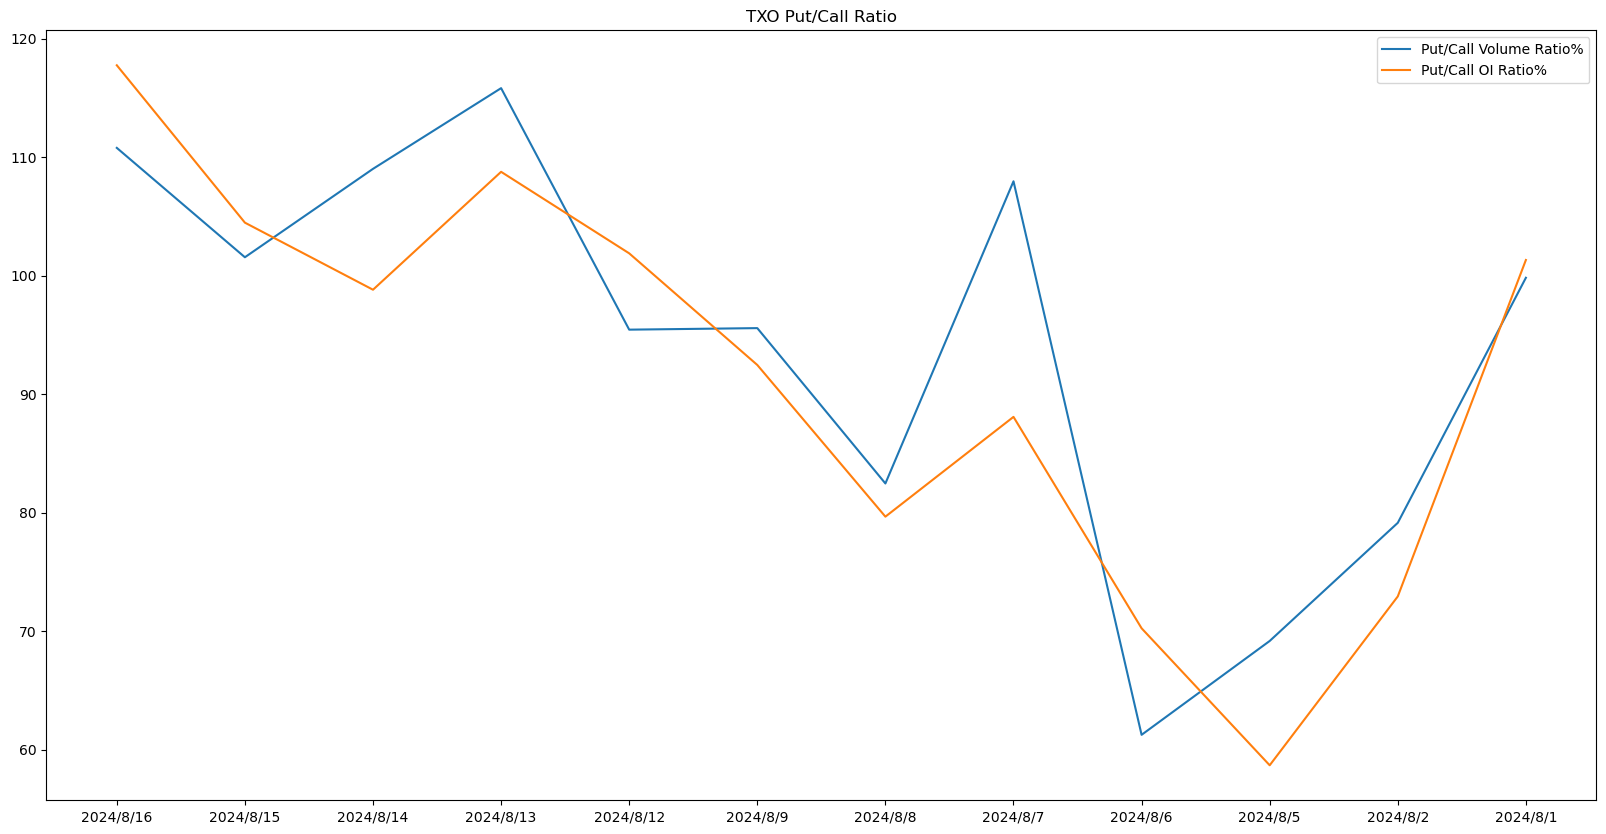

In [72]:
#畫出選擇權P/C比
fig = plt.figure(figsize = (20,10))
plt.title('TXO Put/Call Ratio')
plt.plot(pc_ratio['日期'],pc_ratio['買賣權成交量比率%'])
plt.plot(pc_ratio['日期'],pc_ratio['買賣權未平倉量比率%'])
plt.legend(['Put/Call Volume Ratio%','Put/Call OI Ratio%'])

In [160]:
#資料轉型 把日期從字串(string) 換成時間(datetime)
# for row in range(pc_ratio.shape[0]):
#     date2 = pc_ratio.iloc[row,0].split('/')
#     pc_ratio.iloc[row,0] = datetime(int(date2[0]),int(date2[1]),int(date2[2]))
# pc_ratio.head()                                        
                                        


In [162]:
pc_ratio

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2024-08-09 00:00:00,238157,249142,95.59,182970,197840,92.48
1,2024-08-08 00:00:00,165539,200696,82.48,149621,187774,79.68
2,2024-08-07 00:00:00,635591,588644,107.98,123636,140341,88.10
3,2024-08-06 00:00:00,278496,454550,61.27,194797,277237,70.26
4,2024-08-05 00:00:00,341562,493693,69.19,161017,274316,58.70
5,2024-08-02 00:00:00,386966,488818,79.16,173737,238144,72.95
6,2024-08-01 00:00:00,245915,246309,99.84,174887,172583,101.34
7,2024-07-31 00:00:00,718158,781485,91.90,123060,126930,96.95
8,2024-07-30 00:00:00,434275,562190,77.25,192782,218247,88.33
9,2024-07-29 00:00:00,311280,358078,86.93,173739,186432,93.19


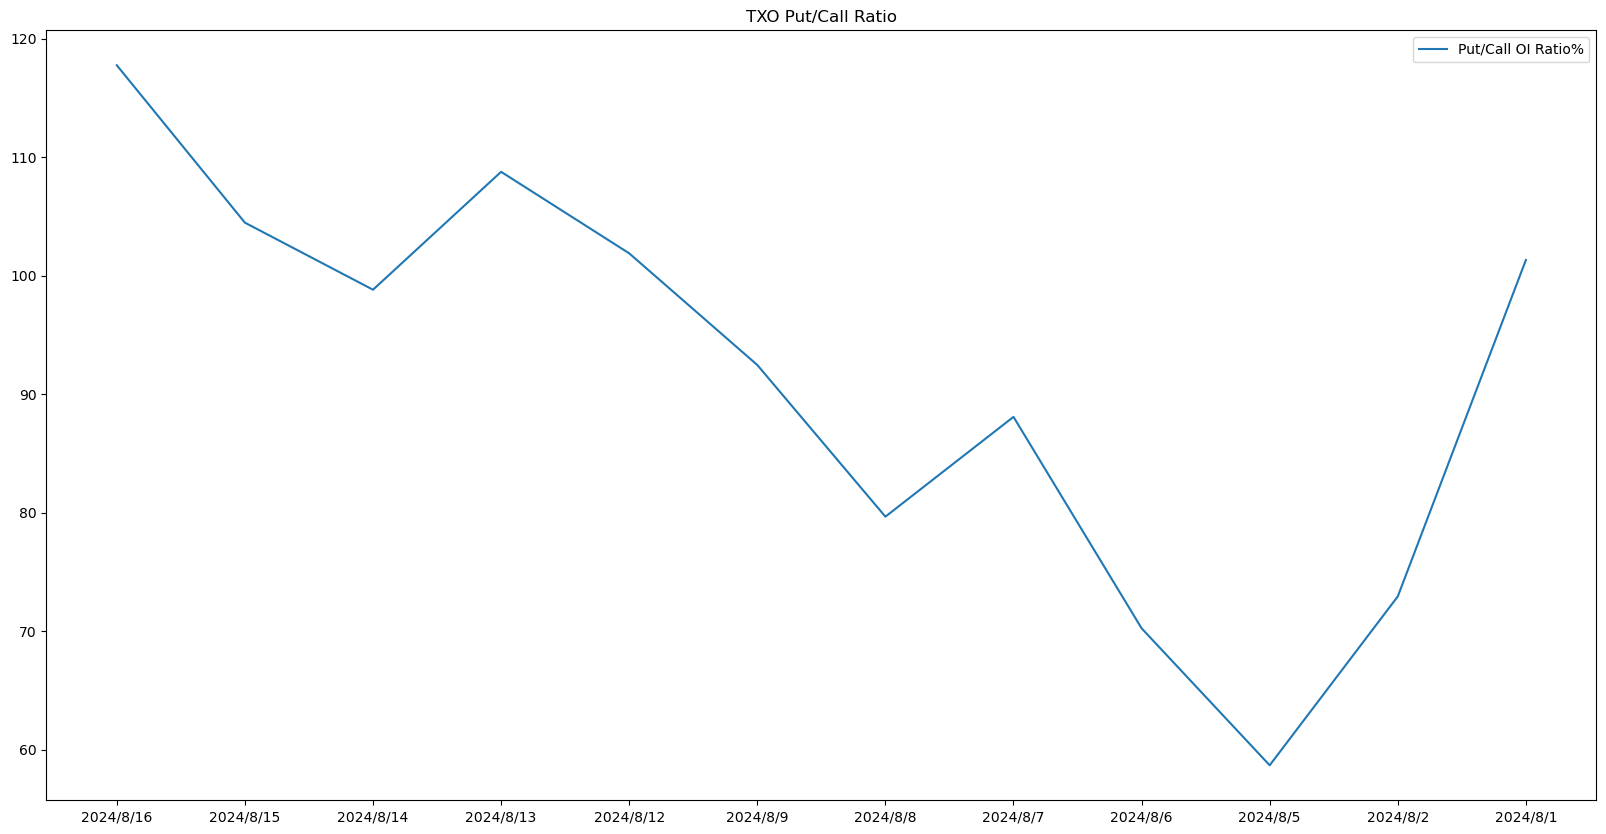

In [74]:
fig = plt.figure(figsize = (20,10))
plt.title('TXO Put/Call Ratio')
plt.plot(pc_ratio['日期'],pc_ratio['買賣權未平倉量比率%'])
plt.legend(['Put/Call OI Ratio%'])